### Mushroom Dataset of simulated mushrooms for binary classification into edible and poisonous



'''
Attribute Information:

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

'''

#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from xgboost import XGBClassifier

#### Dataload

In [2]:
df=pd.read_csv('secondary_data.csv',delimiter=';')

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df.shape

(61069, 21)

<AxesSubplot:>

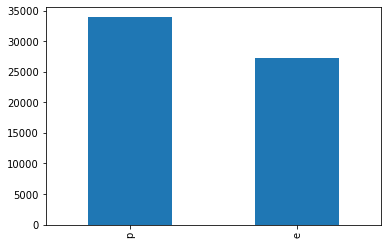

In [5]:
df['class'].value_counts().plot.bar()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [7]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [8]:
df['ring-type'].value_counts()

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

### Filling the Null values with Central Tendency

In [9]:
#Fill the null values with Mode
df['cap-surface'].fillna(df['cap-surface'].mode()[0],inplace=True)
df['gill-attachment'].fillna(df['gill-attachment'].mode()[0],inplace=True)
df['gill-spacing'].fillna(df['gill-spacing'].mode()[0],inplace=True)
df['stem-surface'].fillna(df['stem-surface'].mode()[0],inplace=True)
df['ring-type'].fillna(df['ring-type'].mode()[0],inplace=True)

In [10]:
#Drop columns stem-root,veil-type,veil-color,spore-print-color those are having more than 80% null values
df.drop(columns=['stem-root','veil-type','veil-color','spore-print-color'],inplace=True)

In [11]:
df.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-surface          61069 non-null  object 
 12  stem-color            61069 non-null  object 
 13  has-ring              61069 non-null  object 
 14  ring-type             61069 non-null  object 
 15  habitat            

In [13]:
df['cap-color'].value_counts()

n    24218
y     8543
w     7666
g     4420
e     4035
o     3656
r     1782
u     1709
p     1703
k     1279
b     1230
l      828
Name: cap-color, dtype: int64

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,61069,2,p,33888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-diameter,61069.0,NaN,NaN,NaN,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
cap-shape,61069,7,x,26934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-surface,61069,11,t,22316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-color,61069,12,n,24218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
does-bruise-or-bleed,61069,2,f,50479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-attachment,61069,7,a,22582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,61069,3,c,49773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-color,61069,12,w,18521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stem-height,61069.0,NaN,NaN,NaN,6.581538,3.370017,0.0,4.64,5.95,7.74,33.92


In [15]:
list(df.select_dtypes(['object']).columns)

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-surface',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [16]:
le=LabelEncoder()

df[['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']]= df[['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']].apply(le.fit_transform)

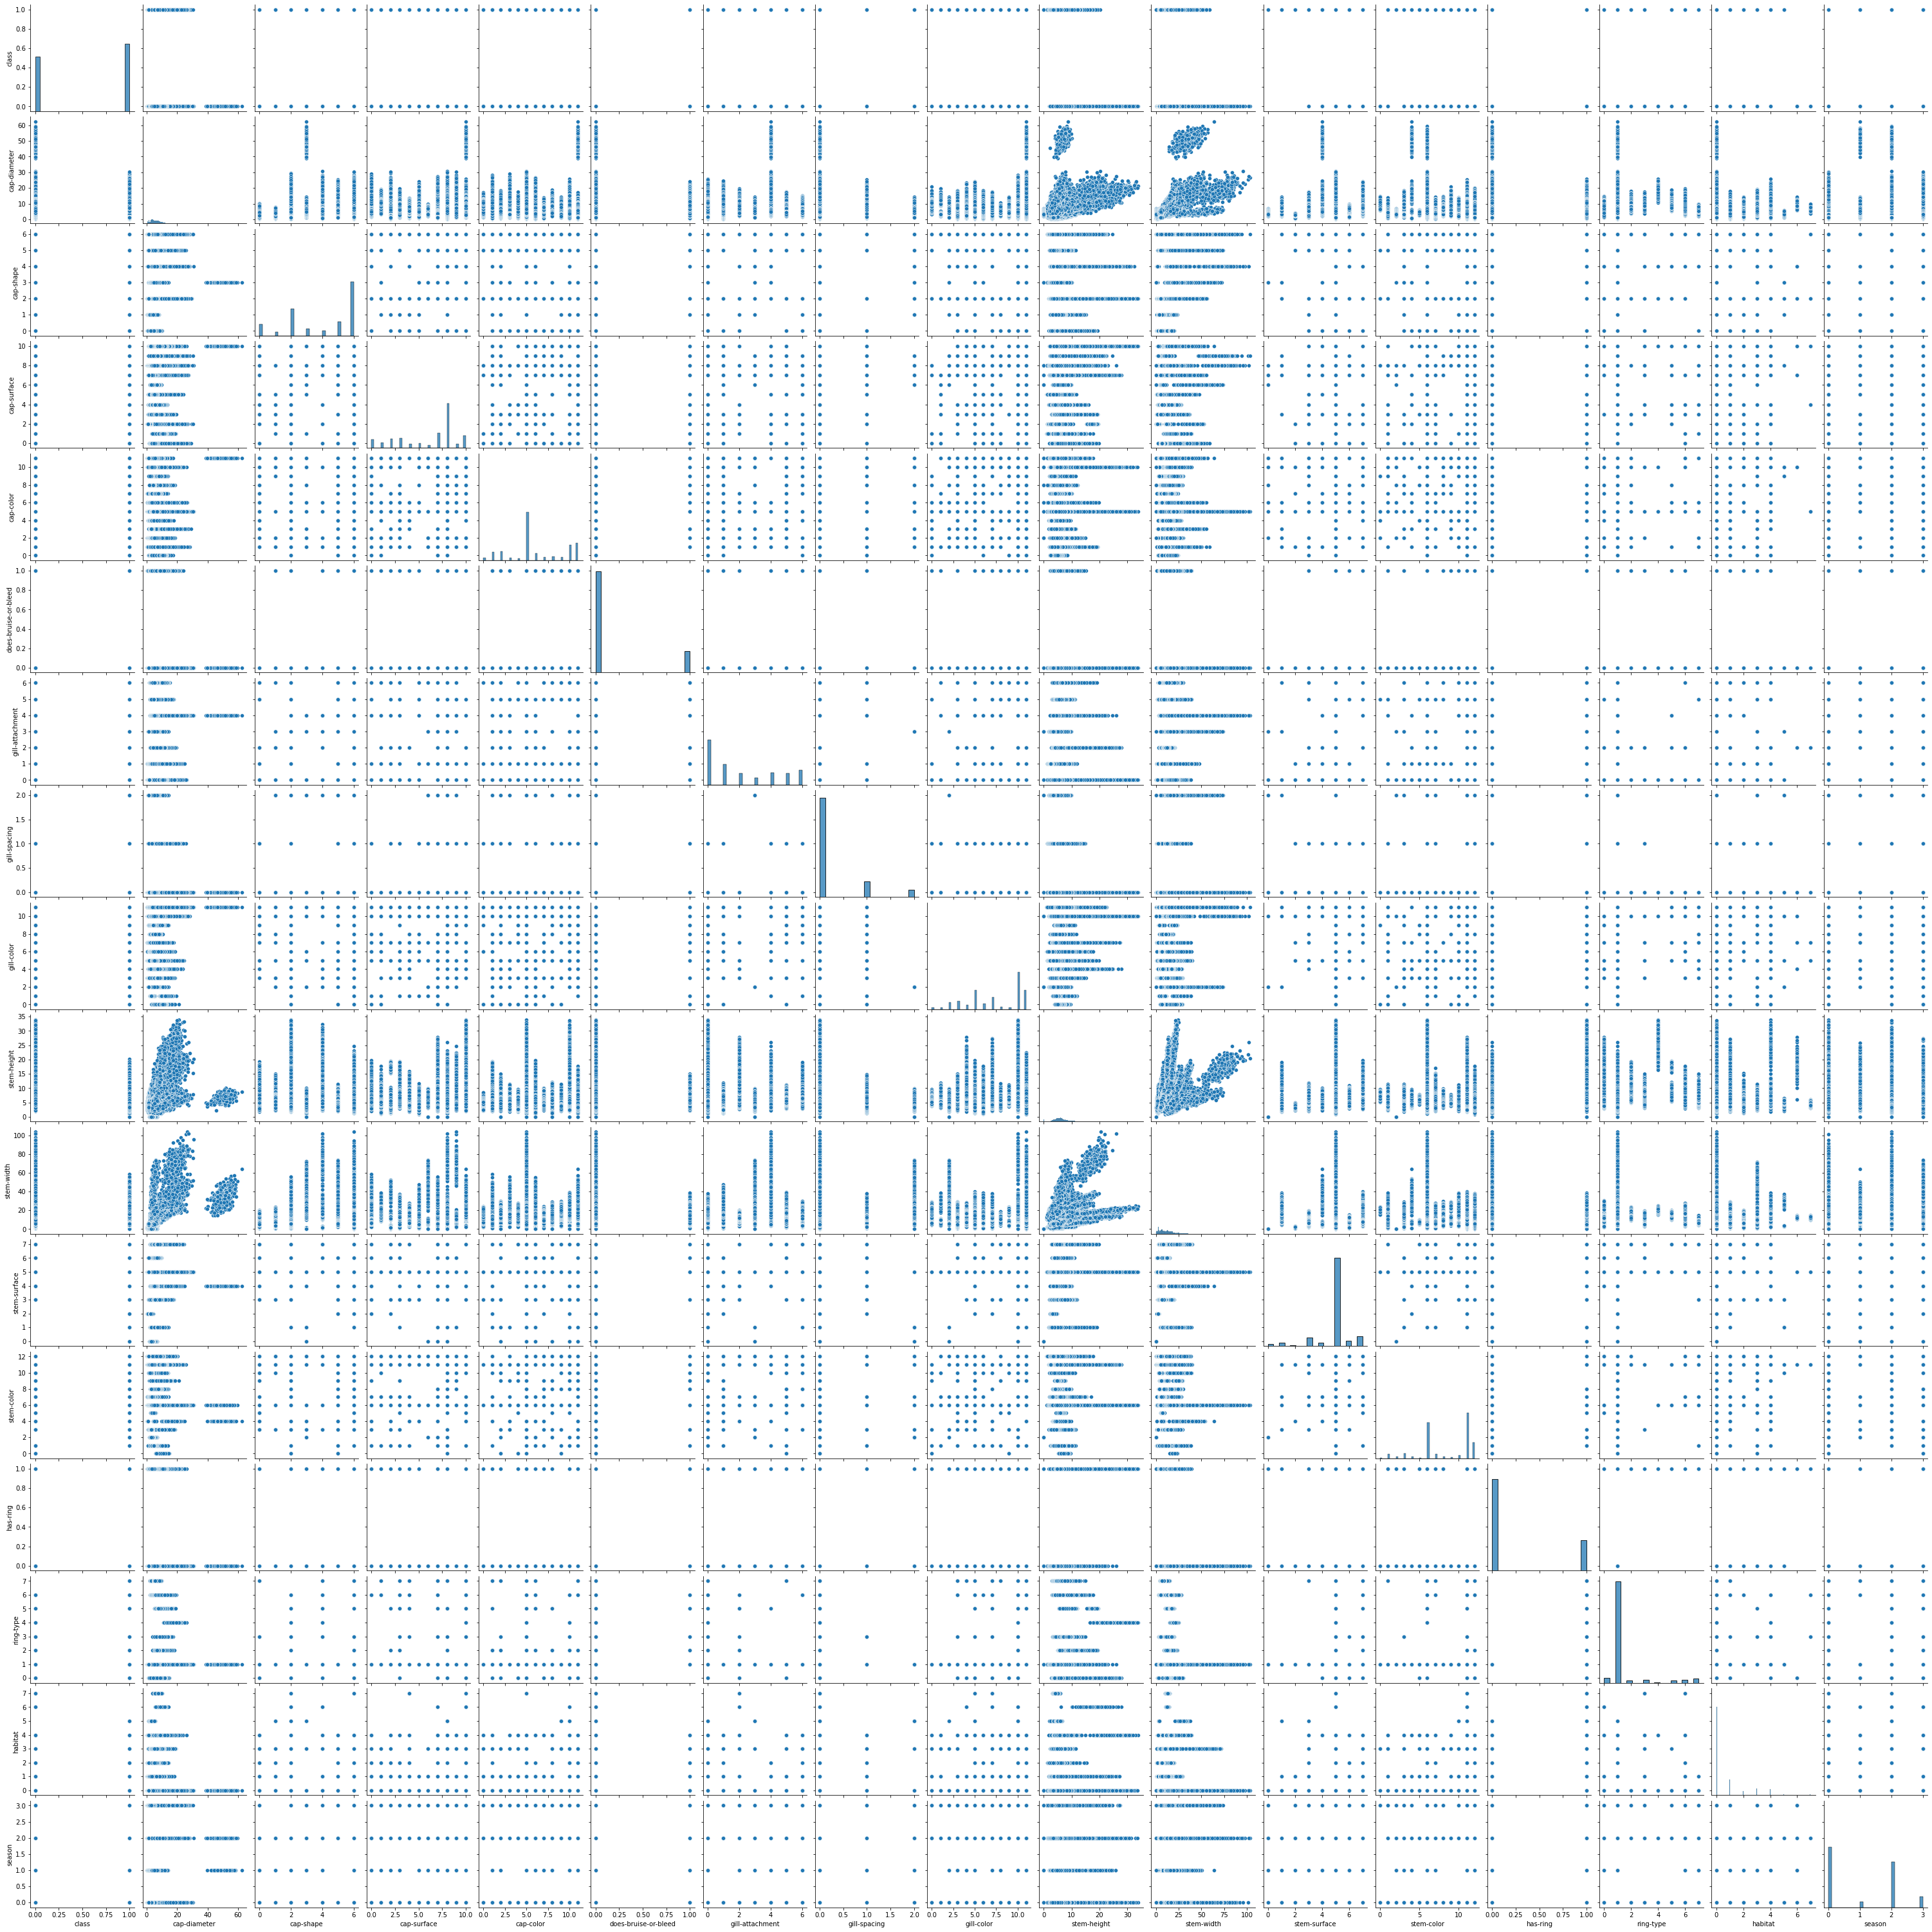

In [17]:
sns.pairplot(df)

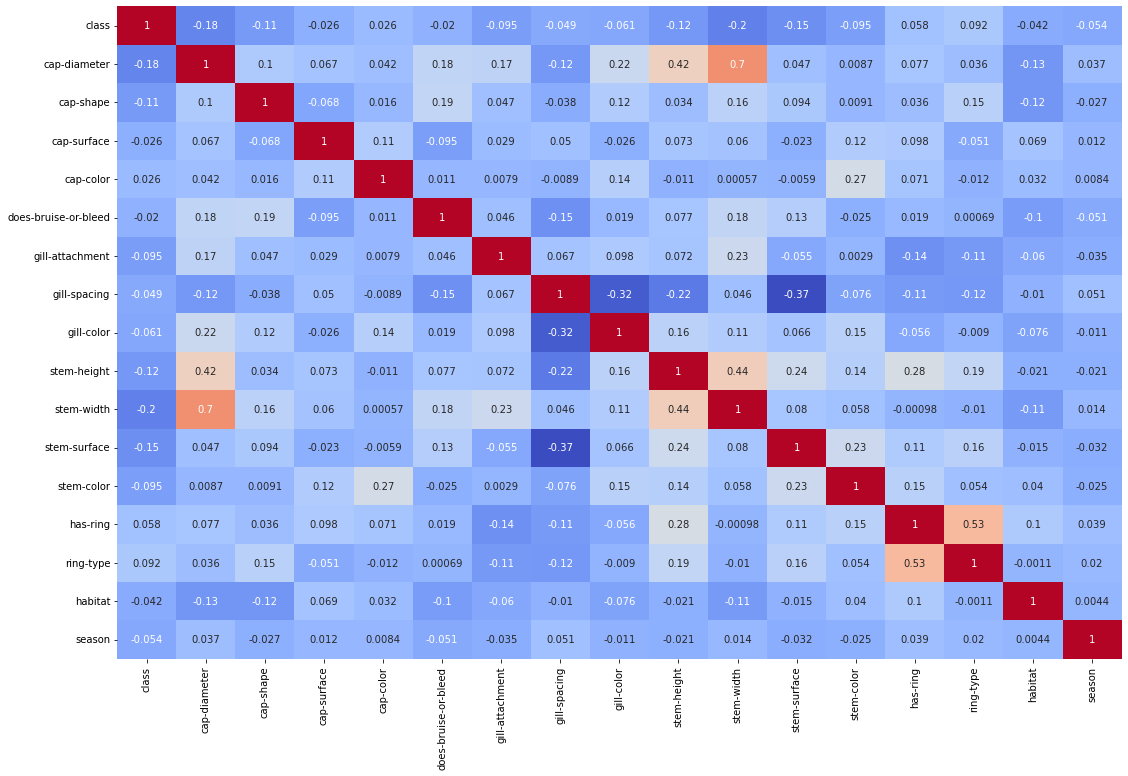

In [18]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,cbar=False)
plt.show()

In [19]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,0,10,16.95,17.09,7,11,1,2,0,3
1,1,16.60,6,2,6,0,2,0,10,17.99,18.19,7,11,1,2,0,2
2,1,14.07,6,2,6,0,2,0,10,17.80,17.74,7,11,1,2,0,3
3,1,14.17,2,3,1,0,2,0,10,15.77,15.98,7,11,1,5,0,3
4,1,14.64,6,3,6,0,2,0,10,16.53,17.20,7,11,1,5,0,3


In [20]:
df.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [21]:
df['cap-diameter'].describe()

count    61069.000000
mean         6.733854
std          5.264845
min          0.380000
25%          3.480000
50%          5.860000
75%          8.540000
max         62.340000
Name: cap-diameter, dtype: float64

In [22]:
ss=StandardScaler()
df[['cap-diameter','stem-height','stem-width']]=pd.DataFrame(ss.fit_transform(df[['cap-diameter','stem-height','stem-width']]),columns=['cap-diameter','stem-height','stem-width'])

In [23]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,1,1.619462,6,2,6,0,2,0,10,3.076705,0.492293,7,11,1,2,0,3
1,1,1.873982,6,2,6,0,2,0,10,3.385311,0.601900,7,11,1,2,0,2
2,1,1.393432,6,2,6,0,2,0,10,3.328931,0.557061,7,11,1,2,0,3
3,1,1.412426,2,3,1,0,2,0,10,2.726555,0.381690,7,11,1,5,0,3
4,1,1.501699,6,3,6,0,2,0,10,2.952075,0.503254,7,11,1,5,0,3


In [24]:
pd.reset_option("display.max_rows")

In [25]:
df[df.duplicated()]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
9863,1,-1.062500,6,2,10,0,0,1,10,-1.024199,-1.033234,5,1,0,1,0,2
12978,1,-1.142276,6,2,11,0,0,0,11,-0.911439,-1.133873,5,12,0,1,0,2
56526,1,-0.467986,3,7,5,0,0,0,10,-1.952985,-1.210598,0,2,0,1,0,2
56533,1,-0.464187,3,8,10,0,0,0,10,-1.952985,-1.210598,0,2,0,1,0,2
56576,1,-0.407205,3,7,10,0,0,0,10,-1.952985,-1.210598,0,2,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58237,1,-0.720607,3,6,2,0,3,2,2,-1.952985,-1.210598,0,2,0,1,0,2
58239,1,-0.652229,3,6,2,0,3,2,2,-1.952985,-1.210598,0,2,0,1,0,2
58241,1,-0.684519,3,6,2,0,3,2,2,-1.952985,-1.210598,0,2,0,1,0,3
58242,1,-0.741501,3,6,2,0,3,2,2,-1.952985,-1.210598,0,2,0,1,0,2


In [26]:
df.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [27]:
df.drop_duplicates(keep='first',inplace=True)

In [28]:
X=df.drop('class',axis=1)
y=df['class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [30]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_pred)))

[[2736 2760]
 [1666 5023]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.55      5496
           1       0.65      0.75      0.69      6689

    accuracy                           0.64     12185
   macro avg       0.63      0.62      0.62     12185
weighted avg       0.63      0.64      0.63     12185

Accuracy Score 0.636766516208453


In [31]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_pred)))

[[5496    0]
 [   0 6689]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5496
           1       1.00      1.00      1.00      6689

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Accuracy Score 1.0


In [32]:
svc=SVC()
svc.fit(X_test,y_test)
svc_pred=svc.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,svc_pred)))

[[4501  995]
 [1123 5566]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5496
           1       0.85      0.83      0.84      6689

    accuracy                           0.83     12185
   macro avg       0.82      0.83      0.82     12185
weighted avg       0.83      0.83      0.83     12185

Accuracy Score 0.8261797291752154


In [33]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,knn_pred)))

[[5483   13]
 [  14 6675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5496
           1       1.00      1.00      1.00      6689

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Accuracy Score 0.9977841608535084


In [39]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,xgb_pred)))

[20:12:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[5491    5]
 [   2 6687]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5496
           1       1.00      1.00      1.00      6689

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Accuracy Score 0.9994255231842429


### Filling the Null values with RandomForest classifier

In [87]:
df_handlenulls=pd.read_csv('secondary_data.csv',delimiter=';')
df_handlenulls.sample(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
724,p,12.69,x,NaN,n,f,e,NaN,w,11.00,...,NaN,NaN,w,u,w,t,g,NaN,d,a
26173,e,10.62,x,s,n,f,x,NaN,n,6.43,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
31223,e,9.79,x,s,n,f,e,c,w,7.89,...,NaN,i,w,NaN,NaN,f,f,p,d,a
38377,p,10.36,x,i,n,f,a,NaN,n,11.78,...,s,NaN,n,NaN,e,f,f,NaN,d,a
20894,p,3.38,b,d,r,f,a,NaN,r,4.81,...,NaN,t,r,NaN,NaN,f,f,NaN,m,a


In [88]:
#Drop columns stem-root,veil-type,veil-color,spore-print-color those are having more than 80% null values
df_handlenulls.drop(columns=['stem-root','veil-type','veil-color','spore-print-color'],inplace=True)

In [89]:
df_handlenulls.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-surface            38124
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

In [58]:
#Fill the null values with Mode
#df_handlenulls['gill-attachment'].fillna(df_handlenulls['gill-attachment'].mode()[0],inplace=True)
#df_handlenulls['gill-spacing'].fillna(df_handlenulls['gill-spacing'].mode()[0],inplace=True)
#df_handlenulls['stem-surface'].fillna(df_handlenulls['stem-surface'].mode()[0],inplace=True)
#df_handlenulls['ring-type'].fillna(df_handlenulls['ring-type'].mode()[0],inplace=True)

In [90]:
df_handlenulls_5=df_handlenulls[['cap-surface','gill-attachment','gill-spacing','stem-surface','ring-type']]

In [91]:
df_handlenulls.drop(columns=['cap-surface','gill-attachment','gill-spacing','stem-surface','ring-type'],inplace=True)

In [92]:
df_handlenulls['ring-type']=df_handlenulls_5['ring-type']

In [93]:
df_handlenulls.shape

(61069, 13)

In [94]:
df_handlenulls.isna().sum()

class                      0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
habitat                    0
season                     0
ring-type               2471
dtype: int64

In [95]:
df_handlenulls[['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color','stem-color', 'has-ring',  'habitat', 'season']]= df_handlenulls[['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed',  'gill-color',
 'stem-color', 'has-ring','habitat', 'season']].apply(le.fit_transform)

In [96]:
df_handlenulls[['cap-diameter','stem-height','stem-width']]=pd.DataFrame(ss.fit_transform(df_handlenulls[['cap-diameter','stem-height','stem-width']]),columns=['cap-diameter','stem-height','stem-width'])

In [97]:
df_handlenulls.drop_duplicates(keep='first',inplace=True)

In [98]:
df_handlenulls.isna().sum()

class                      0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
habitat                    0
season                     0
ring-type               2471
dtype: int64

##### Handling with spore-print-color column null values using RF Classifier

#### ring-type column

In [99]:
df_with_ringtype = df_handlenulls[df_handlenulls['ring-type'].notna()]
df_no_ringtype = df_handlenulls[df_handlenulls['ring-type'].isna()]

print("N. rows with maker not null:", df_with_ringtype.shape[0])
print("N. rows with maker null:", df_no_ringtype.shape[0])

N. rows with maker not null: 58432
N. rows with maker null: 2471


In [45]:
from sklearn.metrics import log_loss

ACCURACY: TRAIN=0.9977 TEST=0.9779
LOG LOSS: 0.03508082396173353


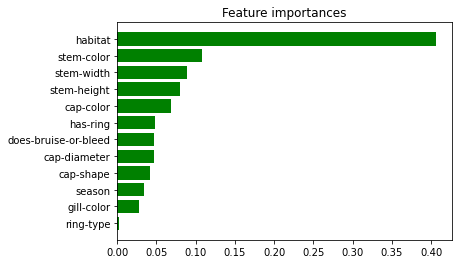

In [100]:
X=df_with_ringtype.drop('ring-type',axis=1)
y=df_with_ringtype['ring-type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_proba)))

importances = forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_ringtype.iloc[:, 1:].columns[indices])
plt.gca().invert_yaxis()

In [101]:
df_no_ringtype = df_no_ringtype.drop('ring-type', axis=1)
ringtype_pred = forest.predict(df_no_ringtype)

df_no_ringtype.insert(0, 'ring-type', ringtype_pred)

In [102]:
frames = [df_with_ringtype, df_no_ringtype]
df_final = pd.concat(frames)
print(df_final.shape[0])

60903


In [103]:
df_final.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
ring-type               0
dtype: int64

#### gill-attachment Column

In [107]:
df_final['gill-attachment']=df_handlenulls_5['gill-attachment']

In [108]:
df_final.isna().sum()

class                      0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
habitat                    0
season                     0
ring-type                  0
gill-attachment         9835
dtype: int64

In [113]:
df_final['ring-type']= df_final[['ring-type']].apply(le.fit_transform)

In [114]:
df_final.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,ring-type,gill-attachment
0,1,1.619462,6,6,0,10,3.076705,0.492293,11,1,0,3,2,e
1,1,1.873982,6,6,0,10,3.385311,0.601900,11,1,0,2,2,e
2,1,1.393432,6,6,0,10,3.328931,0.557061,11,1,0,3,2,e
3,1,1.412426,2,1,0,10,2.726555,0.381690,11,1,0,3,5,e
4,1,1.501699,6,6,0,10,2.952075,0.503254,11,1,0,3,5,e


In [115]:
df_with_gillattachment = df_final[df_final['gill-attachment'].notna()]
df_no_gillattachment= df_final[df_final['gill-attachment'].isna()]

print("N. rows with maker not null:", df_with_gillattachment.shape[0])
print("N. rows with maker null:", df_no_gillattachment.shape[0])

N. rows with maker not null: 51068
N. rows with maker null: 9835


ACCURACY: TRAIN=0.9960 TEST=0.9648
LOG LOSS: 0.07930235414591097


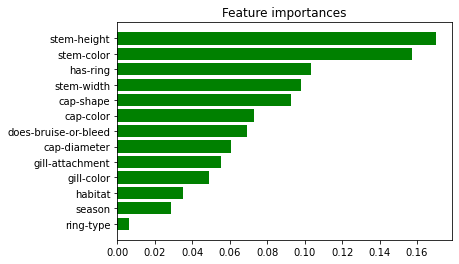

In [117]:
X=df_with_gillattachment.drop('gill-attachment',axis=1)
y=df_with_gillattachment['gill-attachment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_proba)))

importances = forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_gillattachment.iloc[:, 1:].columns[indices])
plt.gca().invert_yaxis()

In [119]:
df_no_gillattachment = df_no_gillattachment.drop('gill-attachment', axis=1)
gillattachment_pred = forest.predict(df_no_gillattachment)

df_no_gillattachment.insert(0, 'gill-attachment', gillattachment_pred)

In [120]:
frames = [df_with_gillattachment, df_no_gillattachment]
df_final = pd.concat(frames)
print(df_final.shape[0])

60903


In [121]:
df_final.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,ring-type,gill-attachment
0,1,1.619462,6,6,0,10,3.076705,0.492293,11,1,0,3,2,e
1,1,1.873982,6,6,0,10,3.385311,0.601900,11,1,0,2,2,e
2,1,1.393432,6,6,0,10,3.328931,0.557061,11,1,0,3,2,e
3,1,1.412426,2,1,0,10,2.726555,0.381690,11,1,0,3,5,e
4,1,1.501699,6,6,0,10,2.952075,0.503254,11,1,0,3,5,e


#### cap-surface Column

In [126]:
df_final['cap-surface']=df_handlenulls_5['cap-surface']

In [127]:
df_final.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
habitat                     0
season                      0
ring-type                   0
gill-attachment             0
cap-surface             14120
dtype: int64

In [129]:
df_final['gill-attachment']= df_final[['gill-attachment']].apply(le.fit_transform)

In [130]:
df_final.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,ring-type,gill-attachment,cap-surface
0,1,1.619462,6,6,0,10,3.076705,0.492293,11,1,0,3,2,2,g
1,1,1.873982,6,6,0,10,3.385311,0.601900,11,1,0,2,2,2,g
2,1,1.393432,6,6,0,10,3.328931,0.557061,11,1,0,3,2,2,g
3,1,1.412426,2,1,0,10,2.726555,0.381690,11,1,0,3,5,2,h
4,1,1.501699,6,6,0,10,2.952075,0.503254,11,1,0,3,5,2,h


In [131]:
df_with_capsurface = df_final[df_final['cap-surface'].notna()]
df_no_capsurface= df_final[df_final['cap-surface'].isna()]

print("N. rows with maker not null:", df_with_capsurface.shape[0])
print("N. rows with maker null:", df_no_capsurface.shape[0])

N. rows with maker not null: 46783
N. rows with maker null: 14120


ACCURACY: TRAIN=0.9785 TEST=0.8064
LOG LOSS: 0.3230028859403621


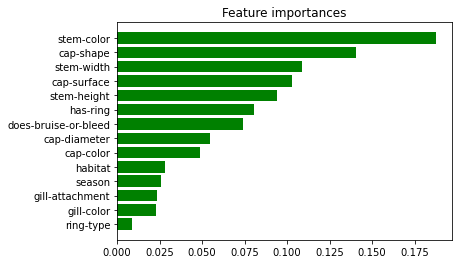

In [132]:
X=df_with_capsurface.drop('cap-surface',axis=1)
y=df_with_capsurface['cap-surface']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_proba)))

importances = forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_capsurface.iloc[:, 1:].columns[indices])
plt.gca().invert_yaxis()

In [133]:
df_no_capsurface = df_no_capsurface.drop('cap-surface', axis=1)
capsurface_pred = forest.predict(df_no_capsurface)

df_no_capsurface.insert(0, 'cap-surface', capsurface_pred)

In [134]:
frames = [df_with_capsurface, df_no_capsurface]
df_final = pd.concat(frames)
print(df_final.shape[0])

60903


#### gill-spacing Column

In [135]:
df_final['gill-spacing']=df_handlenulls_5['gill-spacing']

In [136]:
df_final.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
habitat                     0
season                      0
ring-type                   0
gill-attachment             0
cap-surface                 0
gill-spacing            25062
dtype: int64

In [137]:
df_final['cap-surface']= df_final[['cap-surface']].apply(le.fit_transform)

In [138]:
df_final.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,ring-type,gill-attachment,cap-surface,gill-spacing
0,1,1.619462,6,6,0,10,3.076705,0.492293,11,1,0,3,2,2,2,NaN
1,1,1.873982,6,6,0,10,3.385311,0.601900,11,1,0,2,2,2,2,NaN
2,1,1.393432,6,6,0,10,3.328931,0.557061,11,1,0,3,2,2,2,NaN
3,1,1.412426,2,1,0,10,2.726555,0.381690,11,1,0,3,5,2,3,NaN
4,1,1.501699,6,6,0,10,2.952075,0.503254,11,1,0,3,5,2,3,NaN


In [139]:
df_with_gillspacing = df_final[df_final['gill-spacing'].notna()]
df_no_gillspacing= df_final[df_final['gill-spacing'].isna()]

print("N. rows with maker not null:", df_with_gillspacing.shape[0])
print("N. rows with maker null:", df_no_gillspacing.shape[0])

N. rows with maker not null: 35841
N. rows with maker null: 25062


ACCURACY: TRAIN=0.9997 TEST=0.9986
LOG LOSS: 0.009597693031118461


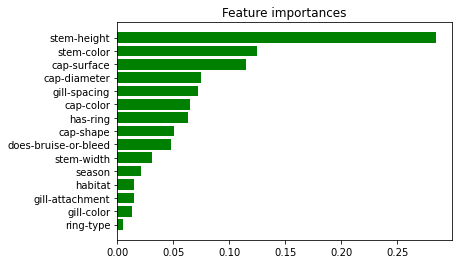

In [140]:
X=df_with_gillspacing.drop('gill-spacing',axis=1)
y=df_with_gillspacing['gill-spacing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_proba)))

importances = forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_gillspacing.iloc[:, 1:].columns[indices])
plt.gca().invert_yaxis()

In [141]:
df_no_gillspacing = df_no_gillspacing.drop('gill-spacing', axis=1)
gillspacing_pred = forest.predict(df_no_gillspacing)

df_no_gillspacing.insert(0, 'gill-spacing', gillspacing_pred)

In [142]:
frames = [df_with_gillspacing, df_no_gillspacing]
df_final = pd.concat(frames)
print(df_final.shape[0])

60903


#### stem-surface Column

In [143]:
df_final['stem-surface']=df_handlenulls_5['stem-surface']

In [144]:
df_final.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
habitat                     0
season                      0
ring-type                   0
gill-attachment             0
cap-surface                 0
gill-spacing                0
stem-surface            38122
dtype: int64

In [145]:
df_final['gill-spacing']= df_final[['gill-spacing']].apply(le.fit_transform)

In [146]:
df_final.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface
2118,1,0.004966,0,10,0,10,1.782932,0.021980,11,1,0,2,3,2,8,0,y
2119,1,0.018262,0,10,0,10,2.153853,0.138562,11,1,0,2,3,2,8,0,y
2120,1,0.449427,0,10,0,10,2.139016,0.152512,11,1,0,0,0,2,8,0,y
2121,1,0.291777,0,10,0,10,1.794801,0.030948,11,1,0,0,3,2,8,0,y
2122,1,0.230995,0,10,0,10,1.934268,0.162476,11,1,0,0,0,2,8,0,y


In [147]:
df_with_stemsurface = df_final[df_final['stem-surface'].notna()]
df_no_stemsurface= df_final[df_final['stem-surface'].isna()]

print("N. rows with maker not null:", df_with_stemsurface.shape[0])
print("N. rows with maker null:", df_no_stemsurface.shape[0])

N. rows with maker not null: 22781
N. rows with maker null: 38122


ACCURACY: TRAIN=0.9960 TEST=0.9535
LOG LOSS: 0.07569998080966044


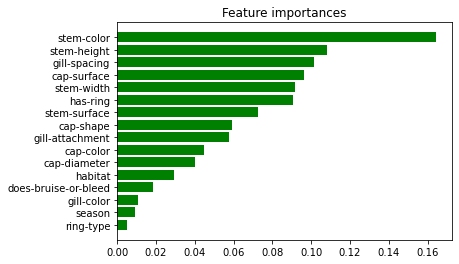

In [148]:
X=df_with_stemsurface.drop('stem-surface',axis=1)
y=df_with_stemsurface['stem-surface']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

forest = RandomForestClassifier(n_estimators=45, max_depth=25, random_state=False, max_features=0.6, min_samples_leaf=3, n_jobs=-1)

forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)

y_pred_proba = forest.predict_proba(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_proba)))

importances = forest.feature_importances_
indices = list(np.argsort(importances))[::-1]

plt.title("Feature importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), df_with_stemsurface.iloc[:, 1:].columns[indices])
plt.gca().invert_yaxis()

In [149]:
df_no_stemsurface = df_no_stemsurface.drop('stem-surface', axis=1)
stemsurface_pred = forest.predict(df_no_stemsurface)

df_no_stemsurface.insert(0, 'stem-surface', stemsurface_pred)

In [150]:
frames = [df_with_stemsurface, df_no_stemsurface]
df_final = pd.concat(frames)
print(df_final.shape[0])

60903


In [151]:
df_final.sample(5)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface
6630,0,-0.145087,5,5,0,10,-0.769005,-0.447336,11,0,2,2,1,1,6,0,s
59108,1,-0.420501,5,11,0,5,-0.852091,-0.633668,6,1,0,2,1,4,5,0,k
20885,1,-0.733903,2,8,0,8,-0.401051,-0.632671,9,0,0,2,1,0,0,0,t
40485,1,0.143623,6,5,0,5,-0.157727,-0.332747,6,0,0,3,1,5,8,0,y
20812,0,-0.728205,6,1,0,1,-0.383247,-0.505129,1,0,4,2,1,0,3,0,g


In [152]:
df_final['stem-surface']= df_final[['stem-surface']].apply(le.fit_transform)

In [153]:
df_final.sample(5)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season,ring-type,gill-attachment,cap-surface,gill-spacing,stem-surface
3534,1,-0.692116,2,10,0,5,-0.463366,-0.827971,11,1,4,2,0,2,10,0,4
48433,0,2.174089,4,5,0,10,4.189468,7.164358,6,0,0,2,1,4,9,0,4
27227,1,2.016438,5,10,1,10,0.061858,1.437901,11,0,0,3,1,1,5,1,4
39606,1,0.098037,1,11,0,8,0.070760,-0.442354,11,0,0,0,1,6,4,0,3
36336,0,-0.361619,6,5,0,5,-0.368410,-0.658578,6,1,0,0,6,6,3,0,7


##### Now Start building the Models

In [154]:
X=df_final.drop('class',axis=1)
y=df_final['class']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [156]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_pred)))

[[2761 2609]
 [1706 5105]]
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      5370
           1       0.66      0.75      0.70      6811

    accuracy                           0.65     12181
   macro avg       0.64      0.63      0.63     12181
weighted avg       0.64      0.65      0.64     12181

Accuracy Score 0.6457597898366308


In [157]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_pred)))

[[5366    4]
 [   5 6806]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5370
           1       1.00      1.00      1.00      6811

    accuracy                           1.00     12181
   macro avg       1.00      1.00      1.00     12181
weighted avg       1.00      1.00      1.00     12181

Accuracy Score 0.9992611444052213


In [158]:
svc=SVC()
svc.fit(X_test,y_test)
svc_pred=svc.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,svc_pred)))

[[4538  832]
 [ 849 5962]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5370
           1       0.88      0.88      0.88      6811

    accuracy                           0.86     12181
   macro avg       0.86      0.86      0.86     12181
weighted avg       0.86      0.86      0.86     12181

Accuracy Score 0.8619981939085462


In [159]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,knn_pred)))

[[5357   13]
 [  29 6782]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5370
           1       1.00      1.00      1.00      6811

    accuracy                           1.00     12181
   macro avg       1.00      1.00      1.00     12181
weighted avg       1.00      1.00      1.00     12181

Accuracy Score 0.9965520072243658


In [160]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,xgb_pred)))

[17:10:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[5365    5]
 [   9 6802]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5370
           1       1.00      1.00      1.00      6811

    accuracy                           1.00     12181
   macro avg       1.00      1.00      1.00     12181
weighted avg       1.00      1.00      1.00     12181

Accuracy Score 0.9988506690747886
